In [1]:
import xarray as xr
import xesmf as xe
import numpy as np 
import pathlib as pl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## Compare Morrison ("mp10") and Thompson ("mp8") Microphysics scheme output

In [48]:
base = pl.Path("/home/wrudisill/scratch/EastLSM_Only")

files_to_read = ["10", "11", "12", "01", "02", "03", "04"]
mp08_2018 = [base.joinpath("WRF_subset_files").joinpath("Thompson","WY2018", "Month%s_SfcMet_wsub_WY2018.nc"%x) for x in files_to_read]
mp10_2018 = [base.joinpath("WRF_subset_files").joinpath("Morrison","WY2018", "Month%s_SfcMet_wsub_WY2018.nc"%x) for x in files_to_read]
mp55_2018 = [base.joinpath("WRF_subset_files").joinpath("Ishmael" ,"WY2018",  "Month%s_SfcMet_wsub_WY2018.nc"%x) for x in files_to_read]


In [49]:
mp08_2018

[PosixPath('/home/wrudisill/scratch/EastLSM_Only/WRF_subset_files/Thompson/WY2018/Month10_SfcMet_wsub_WY2018.nc'),
 PosixPath('/home/wrudisill/scratch/EastLSM_Only/WRF_subset_files/Thompson/WY2018/Month11_SfcMet_wsub_WY2018.nc'),
 PosixPath('/home/wrudisill/scratch/EastLSM_Only/WRF_subset_files/Thompson/WY2018/Month12_SfcMet_wsub_WY2018.nc'),
 PosixPath('/home/wrudisill/scratch/EastLSM_Only/WRF_subset_files/Thompson/WY2018/Month01_SfcMet_wsub_WY2018.nc'),
 PosixPath('/home/wrudisill/scratch/EastLSM_Only/WRF_subset_files/Thompson/WY2018/Month02_SfcMet_wsub_WY2018.nc'),
 PosixPath('/home/wrudisill/scratch/EastLSM_Only/WRF_subset_files/Thompson/WY2018/Month03_SfcMet_wsub_WY2018.nc'),
 PosixPath('/home/wrudisill/scratch/EastLSM_Only/WRF_subset_files/Thompson/WY2018/Month04_SfcMet_wsub_WY2018.nc')]

In [3]:
mp08_2019 = [base.joinpath("WRF_subset_files").joinpath("Thompson","WY2019", "Month%s_SfcMet_wsub_WY2019.nc"%x) for x in files_to_read]
mp10_2019 = [base.joinpath("WRF_subset_files").joinpath("Morrison","WY2019", "Month%s_SfcMet_wsub_WY2019.nc"%x) for x in files_to_read]
mp55_2019 = [base.joinpath("WRF_subset_files").joinpath("Ishmael" ,"WY2019", "Month%s_SfcMet_wsub_WY2019.nc"%x) for x in files_to_read]

In [4]:
mp08_2018 = xr.open_mfdataset(mp08_2018, combine='nested', concat_dim='XTIME')
mp10_2018 = xr.open_mfdataset(mp10_2018, combine='nested', concat_dim='XTIME')
mp55_2018 = xr.open_mfdataset(mp55_2018, combine='nested', concat_dim='XTIME')


In [5]:
mp08_2019 = xr.open_mfdataset(mp08_2019, combine='nested', concat_dim='XTIME')
mp10_2019 = xr.open_mfdataset(mp10_2019, combine='nested', concat_dim='XTIME')
mp55_2019 = xr.open_mfdataset(mp55_2019, combine='nested', concat_dim='XTIME')

In [6]:
# geog file 
# geog = xr.open_dataset("../250m_ModelRuns/geo_em_updatedDEM.d01.nc")
# east_mask = geog.EAST_MASK.where(geog.EAST_MASK >0)
em = mp08_2019.EAST_MASK.isel(XTIME=0)
em = em.where(em>0)
em = em.isel(west_east=slice(0,45), south_north=slice(15,64))


### Differneces in Daily, Domain Average Downwelling Shortwave Radiation

In [7]:
# fig,ax = plt.subplots()
# (mp10_2018.SWDOWN.mean(dim=["south_north", "west_east"]) - mp08_2018.SWDOWN.mean(dim=["south_north", "west_east"])).plot(ax=ax)

In [8]:
# mp10.SWNORM.mean(dim="XTIME").plot()
# mp08.SWNORM.mean(dim="XTIME").plot()
# fig,ax = plt.subplots()
# (mp10.GLW.mean(dim=["south_north", "west_east"]) - mp8.GLW.mean(dim=["south_north", "west_east"])).plot(ax=ax)

### Differneces in Daily, Domain-Average Downwelling LongWaave Radiation

### Precipitation Differences

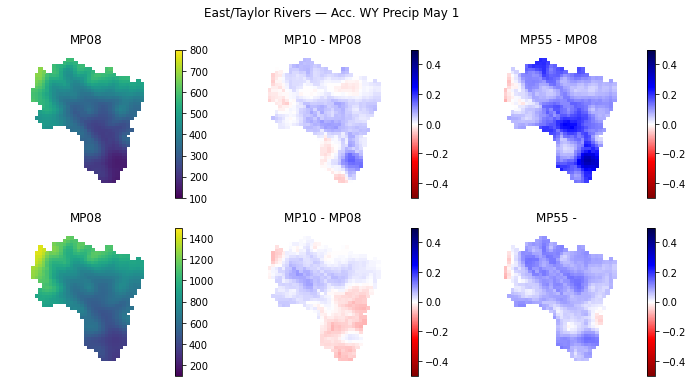

In [9]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches(12,6)



mp08pcp_2018 = mp08_2018.HR_PRCP.isel(west_east=slice(0,45), south_north=slice(15,64)).sum(dim="XTIME")*em
mp10pcp_2018 = mp10_2018.HR_PRCP.isel(west_east=slice(0,45), south_north=slice(15,64)).sum(dim="XTIME")*em
mp55pcp_2018 = mp55_2018.HR_PRCP.isel(west_east=slice(0,45), south_north=slice(15,64)).sum(dim="XTIME")*em

mp08pcp_2018.plot(ax=ax[0,0], vmin=100, vmax=800)
((mp10pcp_2018 - mp08pcp_2018)/mp08pcp_2018).plot(ax=ax[0,1], vmin=-.50, vmax=.50, cmap='seismic_r')
((mp55pcp_2018 - mp08pcp_2018)/mp08pcp_2018).plot(ax=ax[0,2], vmin=-.50, vmax=.50, cmap='seismic_r')


mp08pcp_2019 = mp08_2019.isel(west_east=slice(0,45), south_north=slice(15,64)).HR_PRCP.sum(dim="XTIME")*em
mp10pcp_2019 = mp10_2019.isel(west_east=slice(0,45), south_north=slice(15,64)).HR_PRCP.sum(dim="XTIME")*em
mp55pcp_2019 = mp55_2019.isel(west_east=slice(0,45), south_north=slice(15,64)).HR_PRCP.sum(dim="XTIME")*em

mp08pcp_2019.plot(ax=ax[1,0], vmin=100, vmax=1500)
((mp10pcp_2019 - mp08pcp_2019)/mp08pcp_2019).plot(ax=ax[1,1], vmin=-.5, vmax=.5, cmap='seismic_r')
((mp55pcp_2019 - mp08pcp_2019)/mp08pcp_2019).plot(ax=ax[1,2], vmin=-.5, vmax=.5, cmap='seismic_r')




ax[0,0].set_title("MP08")
ax[0,1].set_title("MP10 - MP08")
ax[0,2].set_title("MP55 - MP08")

ax[1,0].set_title("MP08")
ax[1,1].set_title("MP10 - MP08")
ax[1,2].set_title("MP55 - ")



fig.suptitle("East/Taylor Rivers — Acc. WY Precip May 1")
for axx in ax.flatten():
    axx.set_xticks([])
    axx.set_yticks([])
    axx.set_ylabel("")
    axx.set_xlabel("")

    for spine in axx.spines:
        axx.spines[spine].set_visible(False)



In [10]:
mn18 = ((mp08pcp_2018 + mp10pcp_2018 + mp55pcp_2018)/3).mean().values

In [11]:
mn19 = ((mp08pcp_2019 + mp10pcp_2019 + mp55pcp_2019)/3).mean().values

In [79]:
# compute the relative standard deviation
z1 = np.array([(mp08pcp_2018.mean().values,
                mp10pcp_2018.mean().values,
                mp55pcp_2018.mean().values)])

z1.std()/z1.mean() * 100


4.208106351829233

In [80]:
x = mp08pcp_2018.mean().values
y = mp10pcp_2018.mean().values
z =  mp55pcp_2018.mean().values

mad = (np.abs(x - y) + np.abs(x - z) + np.abs(y - z))/3
print(mad/np.mean([x]) * 100)

6.890876441737053


In [76]:
# compute the relative standard deviation
x = mp08pcp_2019.mean().values
y = mp10pcp_2019.mean().values
z =  mp55pcp_2019.mean().values

mad = (np.abs(x - y) + np.abs(x - z) + np.abs(y - z))/3
print(mad/np.mean([x]) * 100)

4.762098893634952


In [81]:
(4.8 + 6.9)/2.

5.85

In [78]:
np.array([(mp08pcp_2019.mean().values,
           mp10pcp_2019.mean().values,
           mp55pcp_2019.mean().values)]).std()/mn19 * 100



3.060043692346009

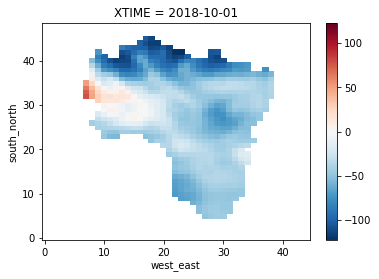

In [11]:
(mp10pcp_2019 - mp55pcp_2019).plot()

NameError: name 'mp10' is not defined

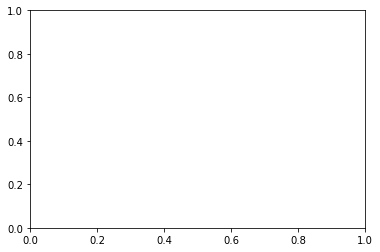

In [12]:
fig,ax = plt.subplots()
mp10.HR_PRCP.mean(dim=["south_north", "west_east"]).cumsum(dim="XTIME").plot(ax=ax, label="morrison")
mp8.HR_PRCP.mean(dim=["south_north", "west_east"]).cumsum().plot(ax=ax, label="thompson")
plt.legend()

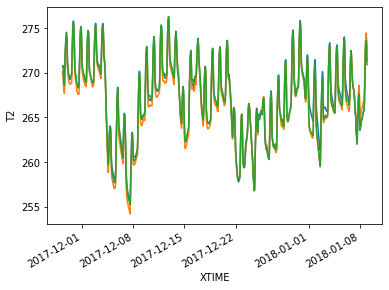

In [8]:
mp08_2018.T2.mean(dim=("south_north", "west_east")).isel(XTIME=slice(1400,2400)).plot()
mp55_2018.T2.mean(dim=("south_north", "west_east")).isel(XTIME=slice(1400,2400)).plot()
mp10_2018.T2.mean(dim=("south_north", "west_east")).isel(XTIME=slice(1400,2400)).plot()

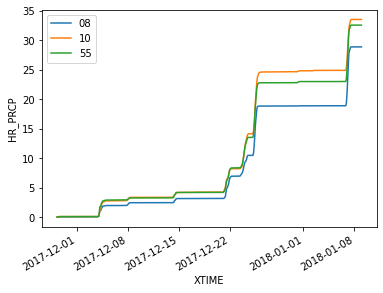

In [12]:
mp08_2018.HR_PRCP.mean(dim=("south_north", "west_east")).isel(XTIME=slice(1400,2400)).cumsum().plot(label='08')
mp55_2018.HR_PRCP.mean(dim=("south_north", "west_east")).isel(XTIME=slice(1400,2400)).cumsum().plot(label='10')
mp10_2018.HR_PRCP.mean(dim=("south_north", "west_east")).isel(XTIME=slice(1400,2400)).cumsum().plot(label='55')
plt.legend()

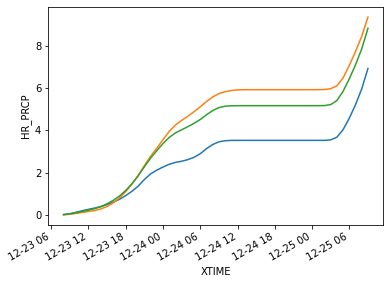

In [14]:
### find the exact time where the storm starts...
mp08_2018.HR_PRCP.mean(dim=("south_north", "west_east")).isel(XTIME=slice(2000,2050)).cumsum().plot(label='08')
mp55_2018.HR_PRCP.mean(dim=("south_north", "west_east")).isel(XTIME=slice(2000,2050)).cumsum().plot(label='10')
mp10_2018.HR_PRCP.mean(dim=("south_north", "west_east")).isel(XTIME=slice(2000,2050)).cumsum().plot(label='55')
